# Polynomial Regression

In [278]:
import numpy as np

class PolynomialRegression:
  def __init__(self, degree=2):
    self.degree = degree
    self.weights = None
    
  def create_polynomial_features(self, X):
    n_samples, n_features = X.shape
    X_poly = np.ones((n_samples, 1))
    for d in range(1, self.degree + 1):
      X_poly = np.column_stack((X_poly, X**d))
    return X_poly
    
  def train(self, X, y):
    X_poly = self.create_polynomial_features(X)
    X_poly = np.c_[np.ones(X_poly.shape[0]), X_poly] #add bias term
    self.weights = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
    return self.weights
  
  def predict(self, X):
    X_poly = self.create_polynomial_features(X)
    X_poly = np.c_[np.ones(X_poly.shape[0]), X_poly]
    return X_poly @ self.weights

ValueError: not enough values to unpack (expected 2, got 1)

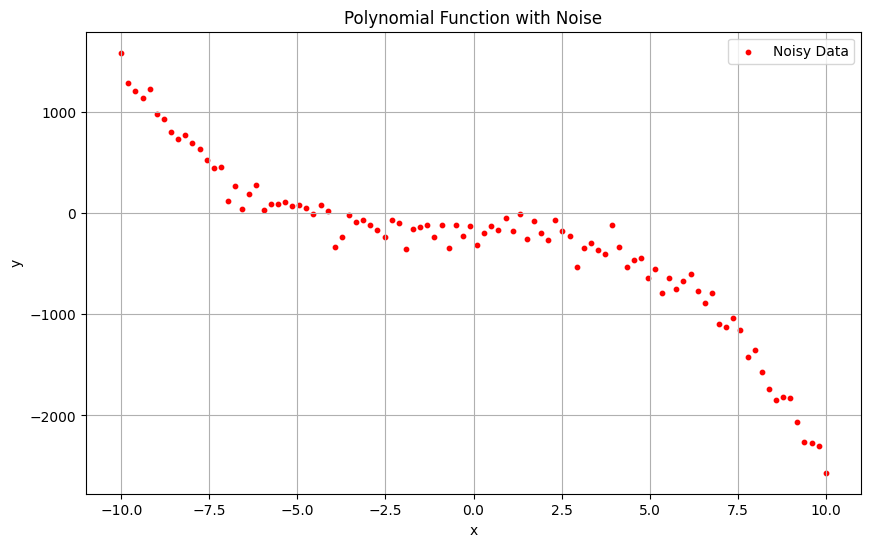

In [279]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


seed = 1337
n_samples = 100
n_features = 1
degree = 3
np.random.seed(seed=seed)

coefficients =np.random.randint(low=-10, high=+10, size=degree+1)

x = np.linspace(-10, 10, 100)

y_true = np.polyval(coefficients, x)  

noise = np.random.normal(loc=-1, scale=0.5, size=x.shape) * 200
y_noisy = y_true + noise

# Optional: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, label='Noisy Data', color='red', s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Function with Noise')
plt.legend()
plt.grid(True)


polynomial_regression = PolynomialRegression(degree=degree)

coef = polynomial_regression.train(x, y_noisy)
print(coef)

plt.show()
